In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#data used: Johns Hopkins
folder = "csse_covid_19_daily_reports (world, copied from Johns Hopkins Data)" #imports folder

#pandas is used below
df = pd.DataFrame() #makes a data table, calls it df

columns = ["Country_Region", "Confirmed", "Deaths", "Recovered"]

for filename in os.listdir(folder):
    #file name is "date" + "." + ending. Looking for ".csv"
    if filename.split(".")[1] == "csv": #file name is string, split name at "." and look at second part
        day = pd.read_csv(folder + "/" + filename) #reads file into DataFrame
        day = day.rename(columns={'Country/Region':"Country_Region"}) #renames column
        day = day[columns] #creates day column
        day["Date"] = filename.split(".")[0] #parses data above, THEN defines filename as Date
        df = df.append(day, ignore_index=True) #adds day column
        
df = df.fillna(0) #fills "na" into 0
df

,Country_Region,Confirmed,Deaths,Recovered,Date
0,Mainland China,1.0,0.0,0.0,01-22-2020
1,Mainland China,14.0,0.0,0.0,01-22-2020
2,Mainland China,6.0,0.0,0.0,01-22-2020
3,Mainland China,1.0,0.0,0.0,01-22-2020
4,Mainland China,0.0,0.0,0.0,01-22-2020
...,...,...,...,...,...
152465,West Bank and Gaza,375.0,2.0,176.0,05-07-2020
152466,Western Sahara,6.0,0.0,5.0,05-07-2020
152467,Yemen,25.0,5.0,1.0,05-07-2020
152468,Zambia,153.0,4.0,103.0,05-07-2020


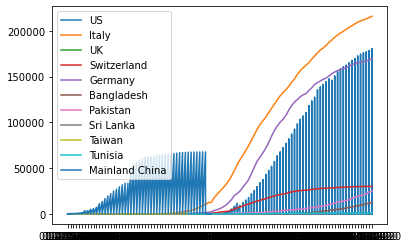

In [3]:
countries = ["US", "Italy", "UK", "Switzerland", "Germany", "Bangladesh", "Pakistan", "Sri Lanka", "Taiwan", "Tunisia", "Mainland China"]

for country in countries:
    c = df[df['Country_Region'] == country] 
    plt.plot(c['Date'], c['Confirmed'], label=country) #'Date' and 'Confirmed' are "traits" of c, countries
    
plt.legend()
plt.show()

In [ ]:
combined = pd.DataFrame()

for country in countries:
    c = df[df['Country_Region'] == country]
    dates = df['Date'].unique() #find unique dates
    for index, date in enumerate(dates):
        day = c[c['Date'] == date] #define date as days since start?
        confirmed_sum = sum(day['Confirmed']) #confirmed per day)
        death_sum = sum(day['Deaths']) #deaths per day
        recovered_sum = sum(day['Recovered']) #recovered per day
        new_row = {'Country':country, 'Date':date, 'Confirmed':confirmed_sum, 'Deaths':death_sum, 'Recovered':recovered_sum, 'Days Since Start': index}
        combined = combined.append(new_row, ignore_index=True) #append: add to list

combined #Creates new data table called "combined," this time it records since patient 0, supposedly more accurate

In [ ]:
for country in countries:
    c = combined[combined['Country'] == country]
    plt.plot(c['Days Since Start'], c['Confirmed'], label=country)
    
plt.legend()
plt.show()
#plot delta on graph

In [ ]:
# Add the change in cases to the dataset
combined['New Cases'] = combined['Confirmed'] - combined['Confirmed'].shift(1) #defines new cases as the confirmed cases of today - confirmed from day before
combined['New Deaths'] = combined['Deaths'] - combined['Deaths'].shift(1)
combined['New Recovered'] = combined['Recovered'] - combined['Recovered'].shift(1)

combined = combined.fillna(0)  # Fill the NaN columns

# Set first value of dataset to zero since it returns negative
combined[combined['New Cases'] < 0] = 0
combined[combined['New Deaths'] < 0] = 0
combined[combined['New Recovered'] < 0] = 0

In [ ]:
for country in countries:
    c = combined[combined['Country'] == country]
    plt.plot(c['Days Since Start'], c['New Cases'], label=country)
    
plt.legend()
plt.show()

In [ ]:
for country in countries:
    c = combined[combined['Country'] == country]
    plt.plot(c['Days Since Start'], c['New Deaths'], label=country)
    
plt.legend()
plt.show()

In [ ]:
for country in countries:
    c = combined[combined['Country'] == country]
    plt.plot(c['Days Since Start'], c['New Recovered'], label=country)
    
plt.legend()
plt.show()